In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

In [2]:
SEMILLA = ((99730+100866+96786+93762)//4)

def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

In [3]:
def obtener_frequencias_gap_test(muestra):
    '''Dada una muestra de numeros aleatorios cuenta cuantos nuemeros seguidos
    pertenecen al intervalo [0.2;0.5] y devuelve un arreglo'''
    repeticiones = 0
    frequencias = []
    for n in range(len(muestra)):
        if (0.2 <= muestra[n] <= 0.5 and repeticiones>0):
            frequencias.append(repeticiones)
            repeticiones = 0
            continue
        repeticiones+=1
    if (repeticiones>0):
        frequencias.append(repeticiones)
    return frequencias

In [4]:
def obtener_frequencias_observadas(freq_gap_test):
    '''Dada una lista cuenta la cantidad de elementos repetidos en un diccionario'''
    frequencias = {i:freq_gap_test.count(i) for i in freq_gap_test}
    return frequencias

In [5]:
muestra = GCL_con_rango(100000,SEMILLA,1664525, 2**32, 1013904223)

In [6]:
#Cuentos los gaps y la cantidad de veces que halla aparecido un gap de tamaño n.
frequencias_gap_test = obtener_frequencias_gap_test(muestra)
frequencias_observadas = obtener_frequencias_observadas(frequencias_gap_test)
##frequencias_observadas

In [23]:
#Defino geometrica para obtener las probabilidades esperadas
def prob_geom(x):
    p = 0.3
    q = ((1-p)**(x-1))*p
    return q

In [19]:
#Busco el estadistico con la formula vista en la practica
def chisquare_test_geom(frequencias_obs): 
    estadistico = 0
    n = sum(frequencias_obs)
    for i in range(len(frequencias_obs)):
        p = prob_geom(frequencias_obs[i])
        estadistico += ((frequencias_obs[i]-n*p)**2) / (n*p)
    return estadistico

In [20]:
#Paso diccionario a arreglo de numpy
names = ['tam_gap','cant_repeticiones']
formats = ['i8','i8']
dtype = dict(names = names, formats=formats)
frequencias = np.array(list(frequencias_observadas.items()), dtype=dtype)

print(repr(frequencias))

array([( 2, 4924), ( 3, 3319), ( 4, 2360), ( 1, 6966), (16,   36),
       ( 5, 1629), (11,  202), ( 8,  576), ( 7,  783), ( 9,  403),
       (13,   91), ( 6, 1174), (10,  302), (15,   37), (14,   73),
       (12,  144), (17,   27), (20,    9), (18,   15), (21,    3),
       (19,   14), (25,    1), (27,    2), (24,    1), (22,    2),
       (39,    1), (33,    1), (26,    1)],
      dtype=[('tam_gap', '<i8'), ('cant_repeticiones', '<i8')])


In [24]:
#Busco el estadistico
estadistico = chisquare_test_geom(frequencias_gap_test)
estadistico

314208860.3563761

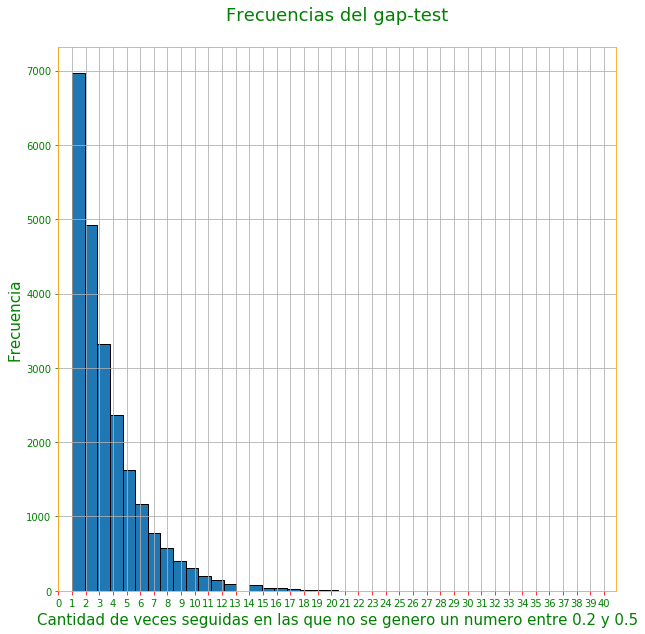

In [59]:
ticksx = list(range(41))
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(frequencias_gap_test, edgecolor='k', bins=41)
plt.xlim(left=0)
plt.xticks(ticksx, color="green")
plt.title('Frecuencias del gap-test\n', fontsize=18).set_color("green")
plt.xlabel('Cantidad de veces seguidas en las que no se genero un numero entre 0.2 y 0.5', fontsize=15).set_color("green")
plt.ylabel('Frecuencia', fontsize=15).set_color("green")
plt.grid();